In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor


In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [3]:
train = pd.read_csv('/Users/khosro/Downloads/train.csv')
test = pd.read_csv('/Users/khosro/Downloads/test.csv')
gender_submission = pd.read_csv('/Users/khosro/Downloads/gender_submission.csv')
#dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

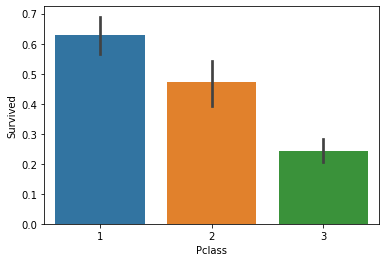

In [5]:
sns.barplot(x="Pclass", y="Survived", data=train)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

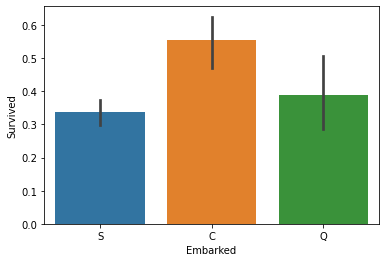

In [6]:
sns.barplot(x="Embarked", y="Survived", data=train)

In [7]:
train.drop(labels = ["Name"], axis = 1, inplace = True)


In [8]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [10]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train[['Age']]=imputer.fit_transform(train[['Age']])
test[['Age']]=imputer.fit_transform(test[['Age']])

In [13]:
train['Sex'] = train.Sex.map({'female': 0, 'male': 1})
test['Sex'] = test.Sex.map({'female': 0, 'male': 1})

In [14]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
X_train = train.drop(columns=['Survived', 'PassengerId', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
Y_train = train["Survived"]
X_test  = test.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1).copy()
Y_test  = gender_submission.drop("PassengerId", axis=1)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((891, 5), (891,), (418, 5), (418, 1))

In [16]:
X_train

,Pclass,Sex,Age,SibSp,Parch
0,3,1,22.000000,1,0
1,1,0,38.000000,1,0
2,3,0,26.000000,0,0
3,1,0,35.000000,1,0
4,3,1,35.000000,0,0
...,...,...,...,...,...
886,2,1,27.000000,0,0
887,1,0,19.000000,0,0
888,3,0,29.699118,1,2
889,1,1,26.000000,0,0


In [17]:
X_test.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
dtype: int64

In [18]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.12

In [19]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

64.09

In [20]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

87.09

In [21]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian


76.88

In [22]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

38.05

In [23]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/Users/khosro/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


80.25

In [24]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

72.5

In [25]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

92.03

In [26]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

92.03

In [29]:
# XGboost

xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)
random_forest.score(X_train, Y_train)
acc_xgb = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_xgb

92.03

In [30]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'XGBoost'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree, acc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,92.03
8,Decision Tree,92.03
9,XGBoost,92.03
1,KNN,87.09
7,Linear SVC,80.25
2,Logistic Regression,79.12
4,Naive Bayes,76.88
6,Stochastic Gradient Decent,72.50
0,Support Vector Machines,64.09
5,Perceptron,38.05
